In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.size']=15

In [2]:
# We can load the dataset using sklearn
iris = datasets.load_iris()
 
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
# The data is saved into a dictionary
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris['data'])
print(iris['target'])
print(iris['feature_names'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The data is saved into a dictionary. 
Each list represents a data point, each element of the list represents a feature (which column represnts which feature is saved in feature_names).
Target is what we will want to predict, and is an encoding for which species is that particular data point from.


In [13]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['species'])\

df_iris = pd.concat([data, target], axis=1, sort=False)

In [16]:
# In this dataframe we have all the information we will use to train our predictive models
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# There are 3 species in our dataset
df_iris.species.unique()

array([0, 1, 2])

#### Split data into train and validation subsets

In [25]:
# Sklearn has methods to make this easily
from sklearn.model_selection import train_test_split

X = df_iris.index
X_train, X_test = train_test_split(X, test_size=0.1)
print(X_train.shape, X_test.shape)

(135,) (15,)


In [30]:
df_train = pd.DataFrame(X_train, columns=['index_name'])
df_train['dataset'] = 'train'

df_test = pd.DataFrame(X_test, columns=['index_name'])
df_test['dataset'] = 'test'

df_train_test = pd.concat([df_train, df_test], sort=False)
df_train_test.set_index('index_name', inplace=True)

In [32]:
df_iris_train_test = pd.merge(left=df_iris, right=df_train_test, left_index=True, right_index=True)

In [33]:
df_iris_train_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,dataset
0,5.1,3.5,1.4,0.2,0,train
1,4.9,3.0,1.4,0.2,0,train
2,4.7,3.2,1.3,0.2,0,train
3,4.6,3.1,1.5,0.2,0,train
4,5.0,3.6,1.4,0.2,0,train
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,train
146,6.3,2.5,5.0,1.9,2,train
147,6.5,3.0,5.2,2.0,2,train
148,6.2,3.4,5.4,2.3,2,train


## Linear regression

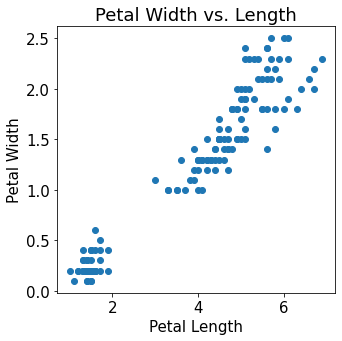

In [29]:
# A linear regression model lets us predict a numerical value.
#  In this particular case, we will look into the relationship between petal lenght and petal width.

plength = data['petal length (cm)']
pwidth = data['petal width (cm)']

f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width vs. Length")
f.tight_layout()

In [35]:
## We can see that there is a linear relation between the length and the width.
#  Lets see if we can model this relation with a linear regression.

mask_train = df_iris_train_test['dataset'] == 'train'
mask_test = df_iris_train_test['dataset'] == 'test'
df_train = df_iris_train_test[mask_train]
df_test = df_iris_train_test[mask_test]

plength_train = df_train['petal length (cm)']
pwidth_train = df_train['petal width (cm)']

plength_test = df_test['petal length (cm)']
pwidth_test = df_test['petal width (cm)']

In [38]:
model_1 = linear_model.LinearRegression()

# Fitting the model to our train data
model_1.fit(pd.DataFrame(plength_train), pwidth_train)

print("Coef\n", model_1.coef_)

print("\n\nBias\n", model_1.intercept_)

Coef
 [0.41808505]


Bias
 -0.36649625907804406


### Our linear regression over the data

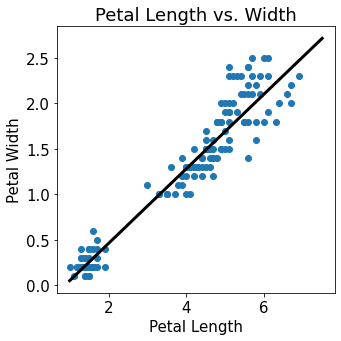

In [40]:
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

xvals = np.arange(plength.min(), plength.max()+1, 0.5)

yvals = 0.41*xvals - 0.36

f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length vs. Width")
f.tight_layout()

### Estimating the error of our model

In [43]:
# There are many ways in which we can measure how close is our predicions to the reality.
# In this particular case we will use two common ones: R2 and MSE.

# We first have to predict the test data using our linear regression model.
ypredict = model_1.predict(pd.DataFrame(plength_test))

# We calculate the MSE using the predicted values and the target values we expected
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(pwidth_test), ypredict))

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(pwidth_test), ypredict))

MSE: 0.05
R2: 0.85


###### We can see there is a good relation between length and width, as MSE is close to 0 and R2 is "close" to 1.

### Using a logistic regression for classification

In [56]:
model_2 = linear_model.LogisticRegression()

# We have to separte the data and the target column
x_train = df_train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y_train = df_train['species']

x_test = df_test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y_test = df_test['species']

model_2.fit(x_train, y_train)

LogisticRegression()

In [58]:
# Predicting the test data using our model
y_pred = model_2.predict(x_test)

# Testing the accuracy of our model
print("Testing accuracy =", accuracy_score(y_test, y_pred))

Testing accuracy = 1.0


###### Our data was linearly separable, thats why we were able to get such a high accuracy.

#### Random forest

In [59]:
# Another possibility to make a classifier is a random forest. It is an ensemble of decision trees made at random.

clf = RandomForestClassifier(n_estimators=3)

# We train the model
clf.fit(x_train, y_train)

# And predict our test data
y_pred=clf.predict(x_test)

print("Testing accuracy =", accuracy_score(y_test, y_pred))



Testing accuracy = 1.0


#### K-means clustering

In [79]:
# What we have done until now is what is called supervised learning, where you try to classify data points into known categories.
# We will use an unsupervised learning method called clustering. For this we don't need to know the categories,
# the algorithm will create them.

# Initializing the model with two clusters
k2model = KMeans(n_clusters=2, random_state=42)

# We fit all the features EXCEPT species, because we are using an unsupervised learning technique.
k2model.fit(df_train[["petal length (cm)", "petal width (cm)"]])

# Calculating inertia.
print("Inertia =", k2model.inertia_)

# Calculating the position of the clusters.
print("Centroids (x, y) =\n", k2model.cluster_centers_)

Inertia = 81.85395833333334
Centroids (x, y) =
 [[4.93563218 1.69425287]
 [1.4875     0.26041667]]


In [80]:
df_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,dataset
11,4.8,3.4,1.6,0.2,0,test
32,5.2,4.1,1.5,0.1,0,test
43,5.0,3.5,1.6,0.6,0,test
51,6.4,3.2,4.5,1.5,1,test
58,6.6,2.9,4.6,1.3,1,test
66,5.6,3.0,4.5,1.5,1,test
72,6.3,2.5,4.9,1.5,1,test
75,6.6,3.0,4.4,1.4,1,test
76,6.8,2.8,4.8,1.4,1,test
86,6.7,3.1,4.7,1.5,1,test


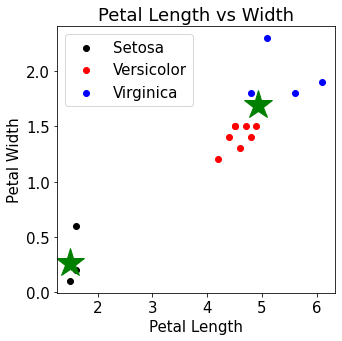

In [81]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(df_test[df_test.species==0]["petal length (cm)"],
           df_test[df_test.species==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(df_test[df_test.species==1]["petal length (cm)"],
           df_test[df_test.species==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(df_test[df_test.species==2]["petal length (cm)"],
           df_test[df_test.species==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graph the centroids with each data point color-coded to its species
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length vs Width")
f.tight_layout()

###### We can see that it identified two clear clusters, and we are able to distinguish between setosa and the rest. But because we used just two clusters, we can't distinguish between versicolor and virginica.

In [90]:
# Initializing the model with three clusters
k3model = KMeans(n_clusters=3, random_state=42)

k3model.fit(df_train[["petal length (cm)", "petal width (cm)"]])

print("Inertia =", k3model.inertia_)

print("Centroids (x, y) =\n", k3model.cluster_centers_)

Inertia = 28.500188829787234
Centroids (x, y) =
 [[5.55       2.01875   ]
 [1.45531915 0.24255319]
 [4.15       1.29      ]]


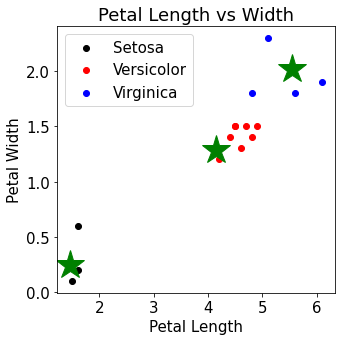

In [91]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(df_test[df_test.species==0]["petal length (cm)"],
           df_test[df_test.species==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(df_test[df_test.species==1]["petal length (cm)"],
           df_test[df_test.species==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(df_test[df_test.species==2]["petal length (cm)"],
           df_test[df_test.species==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graph the centroids with each data point color-coded to its species
ax.plot(k3model.cluster_centers_[:,0],
        k3model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length vs Width")
f.tight_layout()

##### Elbow plot

In [92]:
# What to do when we don't know the number of clusters in advance? We can use a graph of number of clusters vs inertia
#  and look for the "elbow" in the plot.

# For each number of clusters we have to calculate the inertia
num_clusters_list = []
inertia_list = []
for i in range(1, 10):
    num_clusters_list.append(i)
    kimodel = KMeans(n_clusters=i, random_state=42)
    kimodel.fit(df_train[["petal length (cm)", "petal width (cm)"]])

    # Calculating inertia.
    inertia_list.append(kimodel.inertia_)

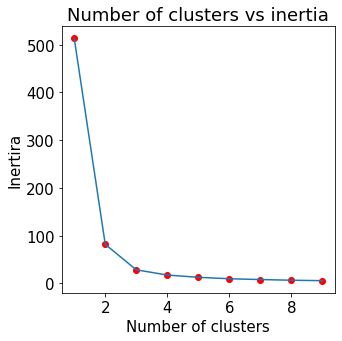

In [93]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)


ax.plot(num_clusters_list,
           inertia_list, 'ro')
ax.plot(num_clusters_list,
           inertia_list)

ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertira")
ax.set_title("Number of clusters vs inertia")
f.tight_layout()

###### We can see that the "elbow" of the plot is between two and three. So we should try with those two and see what fits our data best.

##### Meassuring the accuracy of our clustering

In [97]:
# Given that we classified each data point into one of three classes, we can meassure the accuracy on our test set
#  by assuming that the class of every point in a cluster is the one that the mayority of the points in the training 
# set that fall into that cluster.

# We will fit_predict the training set to see to which cluster every point in the dataset belongs. 
cluster_class = k3model.fit_predict(df_train[["petal length (cm)", "petal width (cm)"]])



In [99]:
df_train['cluster'] = cluster_class

C:\Users\HP\AppData\Local\Temp/ipykernel_20608/2009563393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cluster'] = cluster_class


In [107]:
# This will create a dictionary mapping clusters to the predicted class

dict_cluster_class = {}
for cluster in df_train.cluster.unique():
    cluster_df = df_train[df_train['cluster'] == cluster]
    dict_cluster_class[cluster] = cluster_df['species'].value_counts().index[0]

In [108]:
dict_cluster_class

{1: 0, 2: 1, 0: 2}

In [110]:
# Now we can predict the test data.

test_clusters = k3model.fit_predict(df_test[["petal length (cm)", "petal width (cm)"]])

In [111]:
test_clusters

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2])

In [112]:
# This maps the predicted cluster to the corresponding class (species).

test_predicted_classes = list(map(lambda x: dict_cluster_class[x], test_clusters))

In [116]:
df_test['predicted_class'] = test_predicted_classes

C:\Users\HP\AppData\Local\Temp/ipykernel_20608/1310122765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_class'] = test_predicted_classes


In [123]:
print('The test accuracy of the model is: ', df_test[df_test['predicted_class'] == df_test['species']].shape[0] / df_test.shape[0] * 100)

The test accuracy of the model is:  26.666666666666668


In [120]:
df_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,dataset,predicted_class
11,4.8,3.4,1.6,0.2,0,test,0
32,5.2,4.1,1.5,0.1,0,test,0
43,5.0,3.5,1.6,0.6,0,test,0
51,6.4,3.2,4.5,1.5,1,test,2
58,6.6,2.9,4.6,1.3,1,test,2
66,5.6,3.0,4.5,1.5,1,test,2
72,6.3,2.5,4.9,1.5,1,test,2
75,6.6,3.0,4.4,1.4,1,test,2
76,6.8,2.8,4.8,1.4,1,test,2
86,6.7,3.1,4.7,1.5,1,test,2


In [125]:
train_clusters = k3model.fit_predict(df_train[["petal length (cm)", "petal width (cm)"]])
train_predicted_classes = list(map(lambda x: dict_cluster_class[x], train_clusters))
df_train['predicted_class'] = train_predicted_classes

C:\Users\HP\AppData\Local\Temp/ipykernel_20608/1198226179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predicted_class'] = train_predicted_classes


In [126]:
print('The train accuracy of the model is: ', df_train[df_train['predicted_class'] == df_train['species']].shape[0] / df_train.shape[0] * 100)

The train accuracy of the model is:  97.03703703703704


##### Accuracy is really high on the training set, but it is not generalizing well to the test set. Too much confusion between species 1 and 2.